# HW 2, problem 5

In [18]:
# A lot of my solution is borrowed from code from discussion 2

import numpy as np
import scipy.io
import numpy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

#import data from files
poly = scipy.io.loadmat("1D_POLY_new.MAT")

x_train=poly['x_train']
y_fresh=poly['y_fresh']
y_train=poly['y_train']
# also flatten the data
x_train=x_train.flatten()
y_fresh=y_fresh.flatten()
y_train=y_train.flatten()

# print(x_train)
len(x_train)

20

Part B:

In [3]:
# create a matrix 
# use the size of the data and the polynomial degree
def create_matrix(length,degree,x):
    A = np.zeros((length, degree+1))
# set each column to be a data raised to a power
    for i in range(0, degree+1):
        A[:,i]=x**i
    return A

In [4]:
# define the regression function, when lam=0 then we have OLS
def my_regression(A,b,lam):
# first find A^TA
    At=np.dot(A.T,A)
# then for ridge regression find the shape for the I matrix
    Ishape = At.shape[0]
# add the lam*I to the At
    Atr=At+np.identity(Ishape)*lam
# we are trying to solve (Atr)x=A^Ty, solve linear equations
    Aty=np.dot(A.T,b)
    M=linalg.solve(Atr,Aty)
    return M

In [11]:
# create the prediction matrix from OLS matrix and training
def create_prediction_matrix(ols, x):
    prediction_matrix = []
    for i in range(0, len(x)):
# reset the p=0 for every loop
        p=0.00

        for j in range(0,len(ols)):
            p+=ols[j]*(x[i])**j
        prediction_matrix.append(p)
    return prediction_matrix

In [6]:
# calculate error between predictions
def error(y_prediction, y):
    return np.sum((y_prediction-y)**2)/len(y)

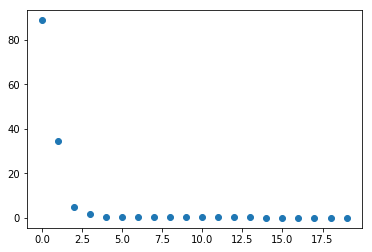

In [7]:
# use the functions defined above to run the OLS and test

error_matrix = []
ols_matrix = []
for i in range(0, len(x_train)):
# create the matrix of polynomials from the data
    P = create_matrix(len(x_train), i, x_train)
# run OLS so set lambda=0 for my regression
    ols = my_regression(P, y_train,0)
    prediction_matrix = create_prediction_matrix(ols, x_train)
    y_error = error(prediction_matrix, y_train)
# add the current error to the error matrix
    error_matrix.append(y_error)
# add the current ols coefficient to the ols matrix - to be used in part d
    ols_matrix.append(ols)
plt.plot(np.arange(0,len(x_train),1), error_matrix,"o")

Part C:

In the above plot, the x axis is the degree of the polynomial and the y axis is the error.
The error will always be decreasing with higher degree because this is just a plot of error from training data.
The benefit from increasing polynomial degree will be decreasing though, as seen in the plateau in the graph.  
This suggests that the data may have been orginally generated from a 3 or 4th degree polynomial as that is where the plateau begins. 

If you try to fit a polynomial of degree n with a standard matrix inversion method then the value of D will determine
whether the system of linear equations is under or over determined system.

Part D:

In this part we are testing how well the OLS model can handle noise.  i.e. the y values are generated for the same x values that were used in training but there is a new noise.

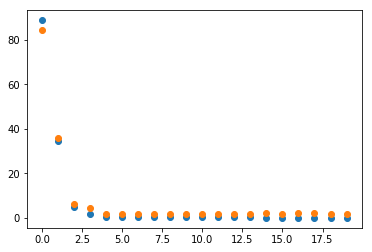

In [8]:
error_matrix_fresh = []
for i in range(0, len(x_train)):
# use the previous ols coefficient matrix
    prediction_matrix = create_prediction_matrix(ols_matrix[i], x_train)
    y_error_fresh = error(prediction_matrix, y_fresh)
    # add the current error to the error matrix
    error_matrix_fresh.append(y_error_fresh)
    
plt.plot(np.arange(0,len(x_train),1), error_matrix,"o")
plt.plot(np.arange(0,len(x_train),1), error_matrix_fresh, "o")

The plot above shows the original plot from part b in blue and the new plot in orange.  
The new plot in orange is on the y_fresh, or the test data.  This shows that as the polynomial degree increases, there may be overfitting because the test error is increasing.  Without this plot, we wouldn't be able to see if overfitting was happening or not.

Part E:

In order to select the right polynomial degree, the two plots are useful.  The one will show the training error and the other shows the test error.  The training error plot gives and idea how much benefit increasing the polynomial by a degree, i.e. how much does the error decreases in one degree step.  From the plot, it seems that it plateaus after the 4th or 5th degree.  The test error plot shows that higher degress may be overfitting the data.  The minimum of both training and testing error is the right polynomial degree.  Based on the plots, it looks to be a 4th degree polynomial.

Part F:

Now instead of a univariate polynomial, we believe the underlying function may be a multivariate polynomial.
There are 5 attributes to consider.  We will use ridge regression with lam=0.1.
I want to split the data up into a testing section (about 10%)
Then from the rest I want to split into 70% training and 30% validation

In [9]:
reg= scipy.io.loadmat("polynomial_regression_samples.mat")
# print(reg)
x=reg['x']
# each column of x is a component and each row is a data point
y=reg['y']

# x.shape

# print(x[1,:])

In [12]:
# # seperate out the testing data 

# num_samples=len(y)
# # choose 10% to be testing data
# num_test=num_samples/10

# x_test=np.zeros((num_test,5))
# x_else=np.zeros(((num_samples-num_test),5))
# y_test=[]
# y_else=[]
# for k in range(0, len(y)-2):
#     if k < num_test:
#         x_test[k,:]=x[k,:]
#         y_test.append(y[k])
#     else:
#         x_else[k,:]=x[k,:]
#         y_else.append(y[k])
        

In [28]:
# create the multivariate matrix 
def create_multi_matrix(x_train, degree,shape):
    multi = np.ones((shape,1))
    for i in range (1,degree + 1):
# line below taken from https://docs.python.org/2/library/itertools.html
        iterator = itertools.combinations_with_replacement([0,1,2,3,4],i)
#     run through all iterations
        for j in iterator:
            s = np.ones((shape,1))
#             run through all values up through current iteration
            for k in j:
                s = s*x_train[:,k].reshape((shape, 1))
            multi = np.concatenate((multi,s), axis=1)
    return multi

In [38]:
# Basic steps, will put in for loop below

# split the data into 4 parts
x1,x2,x3,x4 = np.split(x, 4)
y1,y2,y3,y4 = np.split(y,4)

# choose the training data
x_train = np.vstack((x1,x2,x3))
# print(train.shape[0])
shape=x_train.shape[0]
#shape=75000
print(shape)

multi = create_multi_matrix(x_train,4,shape)
ridge = my_regression(multi,np.vstack((y1, y2, y3)),0.1)
new_error = create_prediction_matrix(ridge, x4)
e=error(new_error, y4)
print(e)

75000
0.351759031787


In [39]:
#returns the validation error with 4-fold-cross-validation
def cross_loop(x_train, y_train, degree, lamda):
    x_train_split = np.split(x_train, 4)
    y_train_split = np.split(y_train,4)
    error = 0
    
    for i in range(0,4):
#         print(i)
        train_index = [0,1,2,3]
        train_index.remove(i)
        x_train_set = np.vstack((x_train_split[train_index[0]], x_train_split[train_index[1]], x_train_split[train_index[2]]))
        y_train_set = np.vstack((y_train_split[train_index[0]], y_train_split[train_index[1]], y_train_split[train_index[2]]))
        x_validation_set = x_train_split[i]
        y_validation_set = y_train_split[i]
        
        shape=75000
        # Regressing with this particular set
        multi = create_multi_matrix(x_train,4,shape)
        ridge = my_regression(multi,np.vstack((y1, y2, y3)),0.1)
        new_error = create_prediction_matrix(ridge, x4)
        e=error(new_error, y_validation_set)
        error = error + average_error
    
    return error / 4

In [40]:
uno=cross_loop(x, y, 1, 0.1)
due=cross_loop(x, y, 2, 0.1)
tre=cross_loop(x, y, 3, 0.1)
quattro=cross_loop(x, y, 4, 0.1)


ValueError: total size of new array must be unchanged

In [ ]:
# Part G: repeat for all of the lambdas

lambdas = [0.05,0.1,0.15,0.2]
for degree in range(1,5):
    for l in range(0,4):
        print(cross_loop(x,y,degree,lambdas[l]))

From what I had seen, the error was actually pretty similar, not a large magnitude off from each other.  
Though, I would have to choose degree 3 to be the best from previous parts and errors seen here